Columns in the dataset: Index(['DATE', 'IPG2211A2N'], dtype='object')
Missing values in each column:
DATE          0
IPG2211A2N    0
dtype: int64


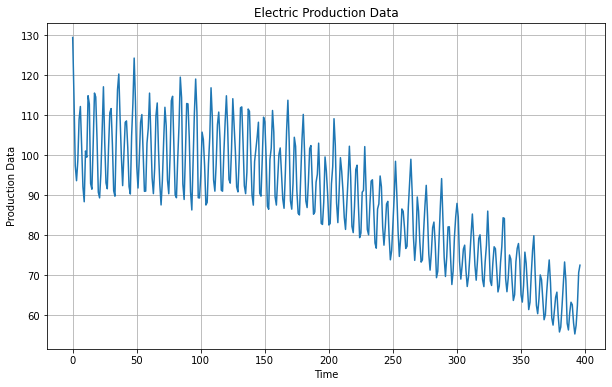

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the stock data
file_path = r'Electric_Production.csv'
data = pd.read_csv(file_path)

# Check the columns to see what data is available
print("Columns in the dataset:", data.columns)

# Ensure there are no leading/trailing spaces in column names
data.columns = data.columns.str.strip()

# Check if 'IPG2211A2N' column exists (assuming this is the relevant data)
if 'IPG2211A2N' not in data.columns:
    raise KeyError("'IPG2211A2N' column not found in the dataset. Please check the column name.")

# Access the 'IPG2211A2N' column
production_data = data['IPG2211A2N']

# Reverse the order of the data to maintain chronological order
production_data_reverse = production_data.iloc[::-1]

# Reset index to maintain the correct time series order
production_data_reverse.reset_index(drop=True, inplace=True)

# 1. Handling Missing Values:
# Check for missing values in each column
print("Missing values in each column:")
print(data.isnull().sum())

# Fill missing values in 'IPG2211A2N' with the mean if there are any NaNs
data['IPG2211A2N'].fillna(data['IPG2211A2N'].mean(), inplace=True)

# 2. Handling Outliers:
# Using IQR (Interquartile Range) to handle outliers for 'IPG2211A2N' column
Q1 = data['IPG2211A2N'].quantile(0.25)
Q3 = data['IPG2211A2N'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers based on the IQR bounds
data = data[(data['IPG2211A2N'] >= lower_bound) & (data['IPG2211A2N'] <= upper_bound)]

# Normalize the 'IPG2211A2N' data for use in further analysis
data_values = production_data_reverse.values.reshape(-1, 1)  # Reshape for normalization
data_normalized = data_values / np.max(data_values)  # Normalize the data

# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(data_normalized) * 0.8)
train_data = data_normalized[:train_size]
test_data = data_normalized[train_size:]

# Plotting the 'IPG2211A2N' data (electric production or the relevant dataset)
plt.figure(figsize=(10, 6))
plt.plot(production_data_reverse)
plt.xlabel('Time')
plt.ylabel('Production Data')
plt.title('Electric Production Data')
plt.grid(True)
plt.show()
